In [2]:
#(source: Simplilearn youtube course) 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.cluster import KMeans
%matplotlib inline

In [50]:
#data cleaning/transforming
data        = pd.read_csv('cars.csv')
brand       = data[data.columns[-1]].to_list()
data        = data[data.columns[:-1]] #removing the car brand. I want to predict that!
data        = data.apply(pd.to_numeric, errors='coerce') # convert all columns of DataFrame to numeric data
#handling missing data
for i in data.columns:
    data[i] = data[i].fillna(int(data[i].mean())) #int to not change the type of int columns

In [51]:
#check if there is null data
for i in data.columns:
    print(data[i].isnull().sum()) #if != 0, it means that there is at least 1 Nan value

0
0
0
0
0
0
0


Text(0, 0.5, 'Sum of squared distances')

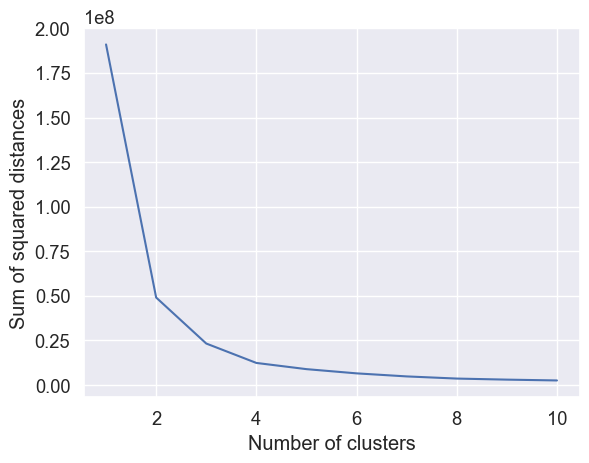

In [52]:
# elbow method to get the optimal K (the one immediatly before stagnation)
squared_distances = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(data)
    squared_distances.append(kmeans.inertia_)
plt.plot(range(1,11),squared_distances)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")

In [53]:
#Training for real now for k=3
kmeans      = KMeans(n_clusters=3)
clustering  = kmeans.fit_predict(data) #untrained model, returns the cluster index associated with each line in data
data_matrix = data.values #removing the header

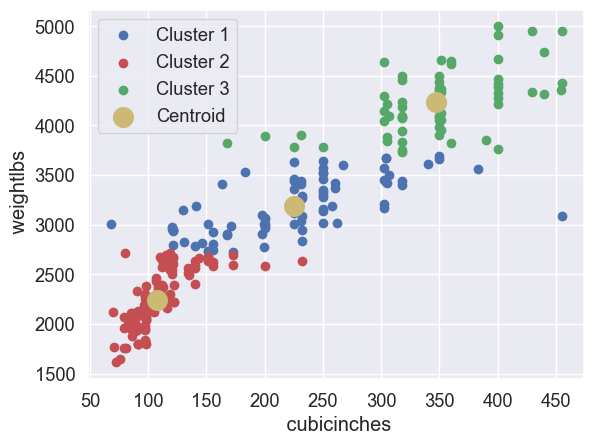

In [80]:
#plotting
x=2 #x axis feature
y=4 #y axis feature

plt.scatter(data_matrix[clustering == 0,x],data_matrix[clustering == 0,y],c='b',label='Cluster 1') #getting all the data lines associated with clustering 0
plt.scatter(data_matrix[clustering == 1,x],data_matrix[clustering == 1,y],c='r',label='Cluster 2') #getting all the data lines associated with clustering 1
plt.scatter(data_matrix[clustering == 2,x],data_matrix[clustering == 2,y],c='g',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,x],kmeans.cluster_centers_[:,y],c='y',s=200,label='Centroid')
plt.xlabel(data.columns[x])
plt.ylabel(data.columns[y])
plt.legend()

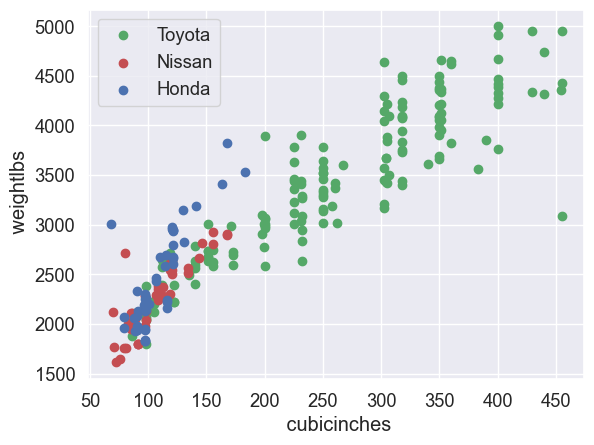

In [81]:
#Identifiying who is in cluster 1, 2 etc (since we have the labels)
#Note that the classification corretales, but not entirely, with the brand
#plt.scatter(data_matrix[brand == ' Toyota',x],data_matrix[brand == ' Toyota',y],c='b',label='Cluster 1') #getting all the data lines associated with clustering 0
toyota_indx = [i for i in range(len(brand)) if 'Toyota' in brand[i]]
toyota_x    = [ data_matrix[indx,x] for indx in toyota_indx ]
toyota_y    = [ data_matrix[indx,y] for indx in toyota_indx ]

nissan_indx = [i for i in range(len(brand)) if 'Nissan' in brand[i]]
nissan_x    = [ data_matrix[indx,x] for indx in nissan_indx ]
nissan_y    = [ data_matrix[indx,y] for indx in nissan_indx ]

honda_indx = [i for i in range(len(brand)) if 'Honda' in brand[i]]
honda_x    = [ data_matrix[indx,x] for indx in honda_indx ]
honda_y    = [ data_matrix[indx,y] for indx in honda_indx ]

plt.scatter(toyota_x,toyota_y,c='g',label='Toyota')
plt.scatter(nissan_x,nissan_y,c='r',label='Nissan')
plt.scatter(honda_x,honda_y,c='b',label='Honda')
plt.xlabel(data.columns[x])
plt.ylabel(data.columns[y])
plt.legend()